In [2]:
import pandas as pd
# Add Matplotlib inline magic command
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import json

# Extract

In [3]:
import requests

In [4]:
# Creating a url to fetch the data from the web
url = "https://www.samhsa.gov/data/sites/default/files/reports/rpt35323/NSDUHDetailedTabs2020v25/NSDUHDetailedTabs2020v25/NSDUHDetTabsSect8pe2020.htm"

In [5]:
# Fetching the data from the web through web scraping
r = requests.get(url)

In [6]:
r

<Response [200]>

In [7]:
# Craete a dataframe to get the tables
df = pd.read_html(url)[4]
df.head(10)

,Geographic/Socioeconomic Characteristic,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020),Aged 26+(2019),Aged 26+(2020),Aged 26-49(2019),Aged 26-49(2020),Aged 50+(2019),Aged 50+(2020)
0,TOTAL,51495,52859,9930,10238,41565,42621,25279,25676,16286,16945
1,GEOGRAPHIC REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Northeast,8608,8383,1611,1677,6997,6707,3970,4160,3027,2546
3,Midwest,11497,11866,2284,2192,9213,9674,5512,6014,3701,3660
4,South,18212,18616,3544,3637,14668,14979,9317,8514,5351,6465
5,West,13178,13994,2491,2733,10686,11261,6480,6987,4207,4273
6,COUNTY TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Large Metro,28346,27213,5573,5311,22773,21902,14283,13407,8490,8495
8,Small Metro,15837,17946,3136,3555,12701,14391,7666,8826,5035,5565
9,Nonmetro,7312,7699,1222,1372,6090,6327,3330,3442,2761,2885


# Transform

In [8]:
df.drop([1], axis = 0, inplace = True)
df.head()

,Geographic/Socioeconomic Characteristic,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020),Aged 26+(2019),Aged 26+(2020),Aged 26-49(2019),Aged 26-49(2020),Aged 50+(2019),Aged 50+(2020)
0,TOTAL,51495,52859,9930,10238,41565,42621,25279,25676,16286,16945
2,Northeast,8608,8383,1611,1677,6997,6707,3970,4160,3027,2546
3,Midwest,11497,11866,2284,2192,9213,9674,5512,6014,3701,3660
4,South,18212,18616,3544,3637,14668,14979,9317,8514,5351,6465
5,West,13178,13994,2491,2733,10686,11261,6480,6987,4207,4273


In [9]:
# Find null values
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")

Column Geographic/Socioeconomic Characteristic has 0 null values
Column Aged 18+(2019) has 4 null values
Column Aged 18+(2020) has 4 null values
Column Aged 18-25(2019) has 4 null values
Column Aged 18-25(2020) has 4 null values
Column Aged 26+(2019) has 4 null values
Column Aged 26+(2020) has 4 null values
Column Aged 26-49(2019) has 4 null values
Column Aged 26-49(2020) has 4 null values
Column Aged 50+(2019) has 4 null values
Column Aged 50+(2020) has 4 null values


In [10]:
#Checking datatype
df.dtypes


Geographic/Socioeconomic Characteristic    object
Aged 18+(2019)                             object
Aged 18+(2020)                             object
Aged 18-25(2019)                           object
Aged 18-25(2020)                           object
Aged 26+(2019)                             object
Aged 26+(2020)                             object
Aged 26-49(2019)                           object
Aged 26-49(2020)                           object
Aged 50+(2019)                             object
Aged 50+(2020)                             object
dtype: object

In [11]:
# df.set_index('Geographic/Socioeconomic Characteristic')
df.head()

,Geographic/Socioeconomic Characteristic,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020),Aged 26+(2019),Aged 26+(2020),Aged 26-49(2019),Aged 26-49(2020),Aged 50+(2019),Aged 50+(2020)
0,TOTAL,51495,52859,9930,10238,41565,42621,25279,25676,16286,16945
2,Northeast,8608,8383,1611,1677,6997,6707,3970,4160,3027,2546
3,Midwest,11497,11866,2284,2192,9213,9674,5512,6014,3701,3660
4,South,18212,18616,3544,3637,14668,14979,9317,8514,5351,6465
5,West,13178,13994,2491,2733,10686,11261,6480,6987,4207,4273


In [12]:
#Drop the Geographic/Socioeconomic Characteristic
cols = df.columns.drop('Geographic/Socioeconomic Characteristic')
cols

Index(['Aged 18+(2019)', 'Aged 18+(2020)', 'Aged 18-25(2019)',
       'Aged 18-25(2020)', 'Aged 26+(2019)', 'Aged 26+(2020)',
       'Aged 26-49(2019)', 'Aged 26-49(2020)', 'Aged 50+(2019)',
       'Aged 50+(2020)'],
      dtype='object')

In [13]:
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce').convert_dtypes() 
df.dtypes

Geographic/Socioeconomic Characteristic    object
Aged 18+(2019)                              Int64
Aged 18+(2020)                              Int64
Aged 18-25(2019)                            Int64
Aged 18-25(2020)                            Int64
Aged 26+(2019)                              Int64
Aged 26+(2020)                              Int64
Aged 26-49(2019)                            Int64
Aged 26-49(2020)                            Int64
Aged 50+(2019)                              Int64
Aged 50+(2020)                              Int64
dtype: object

In [14]:

# Grouping age brackets for 26 plus for 2019

df['26plus_2019'] = df['Aged 26+(2019)'] + df['Aged 26-49(2019)'] + df['Aged 50+(2019)']
df.head(10)

,Geographic/Socioeconomic Characteristic,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020),Aged 26+(2019),Aged 26+(2020),Aged 26-49(2019),Aged 26-49(2020),Aged 50+(2019),Aged 50+(2020),26plus_2019
0,TOTAL,51495,52859,9930,10238,41565,42621,25279,25676,16286,16945,83130
2,Northeast,8608,8383,1611,1677,6997,6707,3970,4160,3027,2546,13994
3,Midwest,11497,11866,2284,2192,9213,9674,5512,6014,3701,3660,18426
4,South,18212,18616,3544,3637,14668,14979,9317,8514,5351,6465,29336
5,West,13178,13994,2491,2733,10686,11261,6480,6987,4207,4273,21373
6,COUNTY TYPE,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7,Large Metro,28346,27213,5573,5311,22773,21902,14283,13407,8490,8495,45546
8,Small Metro,15837,17946,3136,3555,12701,14391,7666,8826,5035,5565,25402
9,Nonmetro,7312,7699,1222,1372,6090,6327,3330,3442,2761,2885,12181
10,Urbanized,3100,3360,596,627,2504,2733,1475,1569,1029,1164,5008


In [15]:
# Grouping age brackets for 26 plus for 2020
df['26plus_2020'] = df['Aged 26+(2020)'] + df['Aged 26-49(2020)'] + df['Aged 50+(2020)']
df.head(10)

,Geographic/Socioeconomic Characteristic,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020),Aged 26+(2019),Aged 26+(2020),Aged 26-49(2019),Aged 26-49(2020),Aged 50+(2019),Aged 50+(2020),26plus_2019,26plus_2020
0,TOTAL,51495,52859,9930,10238,41565,42621,25279,25676,16286,16945,83130,85242
2,Northeast,8608,8383,1611,1677,6997,6707,3970,4160,3027,2546,13994,13413
3,Midwest,11497,11866,2284,2192,9213,9674,5512,6014,3701,3660,18426,19348
4,South,18212,18616,3544,3637,14668,14979,9317,8514,5351,6465,29336,29958
5,West,13178,13994,2491,2733,10686,11261,6480,6987,4207,4273,21373,22521
6,COUNTY TYPE,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7,Large Metro,28346,27213,5573,5311,22773,21902,14283,13407,8490,8495,45546,43804
8,Small Metro,15837,17946,3136,3555,12701,14391,7666,8826,5035,5565,25402,28782
9,Nonmetro,7312,7699,1222,1372,6090,6327,3330,3442,2761,2885,12181,12654
10,Urbanized,3100,3360,596,627,2504,2733,1475,1569,1029,1164,5008,5466


In [16]:
# Drop Unnecessary age brackets
df.drop(['Aged 26+(2019)', 'Aged 26+(2020)', 'Aged 26-49(2019)', 'Aged 26-49(2020)', 'Aged 50+(2019)', 'Aged 50+(2020)'], axis = 1, inplace = True)
df.head()

,Geographic/Socioeconomic Characteristic,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020),26plus_2019,26plus_2020
0,TOTAL,51495,52859,9930,10238,83130,85242
2,Northeast,8608,8383,1611,1677,13994,13413
3,Midwest,11497,11866,2284,2192,18426,19348
4,South,18212,18616,3544,3637,29336,29958
5,West,13178,13994,2491,2733,21373,22521


In [17]:
df.head()

,Geographic/Socioeconomic Characteristic,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020),26plus_2019,26plus_2020
0,TOTAL,51495,52859,9930,10238,83130,85242
2,Northeast,8608,8383,1611,1677,13994,13413
3,Midwest,11497,11866,2284,2192,18426,19348
4,South,18212,18616,3544,3637,29336,29958
5,West,13178,13994,2491,2733,21373,22521


In [18]:
df = df.set_index('Geographic/Socioeconomic Characteristic')
df.head()

,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020),26plus_2019,26plus_2020
Geographic/Socioeconomic Characteristic,,,,,,
TOTAL,51495,52859,9930,10238,83130,85242
Northeast,8608,8383,1611,1677,13994,13413
Midwest,11497,11866,2284,2192,18426,19348
South,18212,18616,3544,3637,29336,29958
West,13178,13994,2491,2733,21373,22521


In [19]:
## Function checking for missing values
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [20]:
#Print missing values
missing_values_table(df)

Your selected dataframe has 6 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Aged 18+(2019),5,18.5
Aged 18+(2020),5,18.5
Aged 18-25(2019),5,18.5
Aged 18-25(2020),5,18.5
26plus_2019,5,18.5
26plus_2020,5,18.5


In [21]:
# tables = pd.read_html(url)
# tables


In [22]:
#Remove last row from the dataframe
df2 = df.iloc[:-1 , :]
df2.head(27)

,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020),26plus_2019,26plus_2020
Geographic/Socioeconomic Characteristic,,,,,,
TOTAL,51495,52859,9930,10238,83130,85242
Northeast,8608,8383,1611,1677,13994,13413
Midwest,11497,11866,2284,2192,18426,19348
South,18212,18616,3544,3637,29336,29958
West,13178,13994,2491,2733,21373,22521
COUNTY TYPE,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Large Metro,28346,27213,5573,5311,45546,43804
Small Metro,15837,17946,3136,3555,25402,28782
Nonmetro,7312,7699,1222,1372,12181,12654


In [23]:
df.dropna()

,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020),26plus_2019,26plus_2020
Geographic/Socioeconomic Characteristic,,,,,,
TOTAL,51495,52859,9930,10238,83130,85242
Northeast,8608,8383,1611,1677,13994,13413
Midwest,11497,11866,2284,2192,18426,19348
South,18212,18616,3544,3637,29336,29958
West,13178,13994,2491,2733,21373,22521
Large Metro,28346,27213,5573,5311,45546,43804
Small Metro,15837,17946,3136,3555,25402,28782
Nonmetro,7312,7699,1222,1372,12181,12654
Urbanized,3100,3360,596,627,5008,5466


In [24]:
geographic_df = df.iloc[1:5]
geographic_df

,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020),26plus_2019,26plus_2020
Geographic/Socioeconomic Characteristic,,,,,,
Northeast,8608,8383,1611,1677,13994,13413
Midwest,11497,11866,2284,2192,18426,19348
South,18212,18616,3544,3637,29336,29958
West,13178,13994,2491,2733,21373,22521


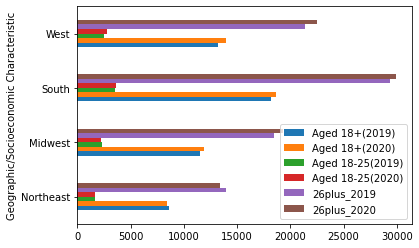

In [25]:
from matplotlib import figure
geographic_df.plot.barh()
plt.savefig("Resources/Regional_Ami.jpg")

In [26]:
# Converting specific column to Series
series = geographic_df.iloc[:,1]
series

Geographic/Socioeconomic Characteristic
Northeast     8383
Midwest      11866
South        18616
West         13994
Name: Aged 18+(2020), dtype: Int64

In [27]:
education_df = df.iloc[17:21]
education_df

,Aged 18+(2019),Aged 18+(2020),Aged 18-25(2019),Aged 18-25(2020),26plus_2019,26plus_2020
Geographic/Socioeconomic Characteristic,,,,,,
< High School,5505,5552,1107,933,8797,9238
High School Graduate,11705,13170,2839,2794,17733,20752
Some College/Associate‘s Degree,18250,18339,4584,4662,27332,27354
College Graduate,16034,15798,1400,1850,29266,27898


<AxesSubplot:xlabel='Geographic/Socioeconomic Characteristic'>

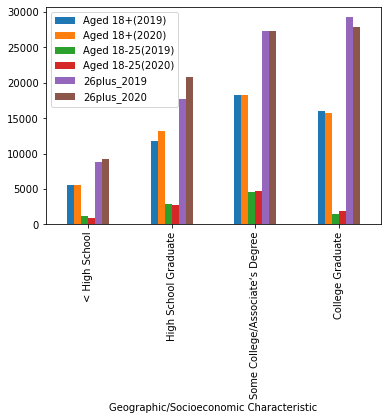

In [28]:
from matplotlib import figure
education_df.plot.bar()

/var/folders/7p/_q1j0ygs52dgc639vdlwt20m0000gn/T/ipykernel_47725/3632776774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_df['growth_rate'] = change_rate_18_25


<AxesSubplot:xlabel='Geographic/Socioeconomic Characteristic'>

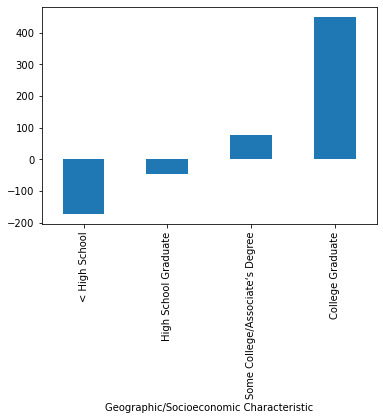

In [29]:
# Find the change in total number of cases for 2020 amongst adults 18-25
change_rate_18_25 = (education_df['Aged 18-25(2020)']-education_df['Aged 18-25(2019)'])

education_df['growth_rate'] = change_rate_18_25

education_df.sort_values(by=['growth_rate'],ascending=False)
change_rate_18_25.plot.bar()

/var/folders/7p/_q1j0ygs52dgc639vdlwt20m0000gn/T/ipykernel_47725/814227259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_df['growth_rate'] = change_rate_26Plus


<AxesSubplot:xlabel='Geographic/Socioeconomic Characteristic'>

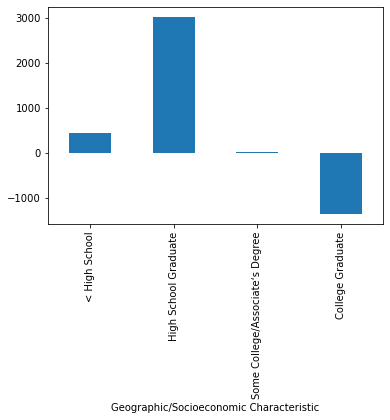

In [30]:
change_rate_26Plus = (education_df['26plus_2020']-education_df['26plus_2019'])

education_df['growth_rate'] = change_rate_26Plus

education_df.sort_values(by=['growth_rate'],ascending=False)
change_rate_26Plus.plot.bar()

In [31]:
# Save dataframe as a csv file 
df.to_csv('Resources/table4.csv')

<AxesSubplot:xlabel='Geographic/Socioeconomic Characteristic'>

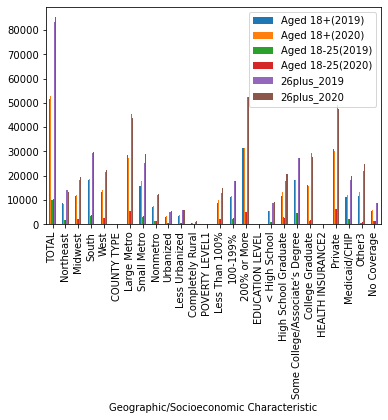

In [32]:
# Plot the dataframe for a quick overview
df2.plot.bar()

In [33]:
df3 = pd.read_csv('Resources/covid_cleaned.csv')
df3.head()

,Unnamed: 0,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
0,0,AK,76993509,0,0,263307,0,406984,0,0,1109,0
1,1,AL,495866086,372514245,123351841,1370792,388554,8946436,7052062,1894374,19781,4602
2,2,AR,314253729,0,0,871467,247126,4678130,0,0,11316,2830
3,3,AS,618133,0,0,6505,0,2546,0,0,31,0
4,4,AZ,762685906,691776565,70849280,2145765,256800,12984264,11445303,1537111,30810,3994


In [34]:
df3.set_index('state')

,Unnamed: 0,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
state,,,,,,,,,,,
AK,0,76993509,0,0,263307,0,406984,0,0,1109,0
AL,1,495866086,372514245,123351841,1370792,388554,8946436,7052062,1894374,19781,4602
AR,2,314253729,0,0,871467,247126,4678130,0,0,11316,2830
AS,3,618133,0,0,6505,0,2546,0,0,31,0
AZ,4,762685906,691776565,70849280,2145765,256800,12984264,11445303,1537111,30810,3994
CA,5,3305642241,3159478078,146164163,10035241,534865,41363286,20529490,0,91795,0
CO,6,499355370,458969735,40385635,1546422,142342,5328084,4672568,655516,12783,1509
CT,7,282636713,256463850,25991615,819915,87368,6071140,4950197,1113088,11051,2211
DC,8,48506690,0,0,157435,0,796495,0,0,1351,0


In [35]:
# Drop Unnecessary columns
df3.drop(['conf_cases', 'prob_cases', 'new_case', 'pnew_case', 'conf_death', 'prob_death', 'new_death', 'pnew_death'], axis = 1, inplace =True)
df3.head()

,Unnamed: 0,state,tot_cases,tot_death
0,0,AK,76993509,406984
1,1,AL,495866086,8946436
2,2,AR,314253729,4678130
3,3,AS,618133,2546
4,4,AZ,762685906,12984264


In [36]:
df3['State']= df3['state']
df3

,Unnamed: 0,state,tot_cases,tot_death,State
0,0,AK,76993509,406984,AK
1,1,AL,495866086,8946436,AL
2,2,AR,314253729,4678130,AR
3,3,AS,618133,2546,AS
4,4,AZ,762685906,12984264,AZ
5,5,CA,3305642241,41363286,CA
6,6,CO,499355370,5328084,CO
7,7,CT,282636713,6071140,CT
8,8,DC,48506690,796495,DC
9,9,DE,94405711,1378168,DE


In [37]:
df3.drop(['state'], axis = 1, inplace = True)

In [38]:
# shift column 'State' to first position
first_column = df3.pop('State')  
# insert column using insert(position,column_name,first_column) function
df3.insert(0, 'State', first_column)
df3


,State,Unnamed: 0,tot_cases,tot_death
0,AK,0,76993509,406984
1,AL,1,495866086,8946436
2,AR,2,314253729,4678130
3,AS,3,618133,2546
4,AZ,4,762685906,12984264
5,CA,5,3305642241,41363286
6,CO,6,499355370,5328084
7,CT,7,282636713,6071140
8,DC,8,48506690,796495
9,DE,9,94405711,1378168


In [39]:
df3.drop([3,11,13,39, 44,45,47,51,54 ], axis =0, inplace = True)
df3.head()

,State,Unnamed: 0,tot_cases,tot_death
0,AK,0,76993509,406984
1,AL,1,495866086,8946436
2,AR,2,314253729,4678130
4,AZ,4,762685906,12984264
5,CA,5,3305642241,41363286


In [40]:
Fi_List = ['01', '02', '04','05','06','08', '09','10', '11', '12', '13', '15', '16','17', '18', '19','20', '21', '22', '23', '24','25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45','46','47', '48', '49', '50', '51', '53', '54', '55', '56']
df3['FIPS'] = Fi_List
df3

,State,Unnamed: 0,tot_cases,tot_death,FIPS
0,AK,0,76993509,406984,01
1,AL,1,495866086,8946436,02
2,AR,2,314253729,4678130,04
4,AZ,4,762685906,12984264,05
5,CA,5,3305642241,41363286,06
6,CO,6,499355370,5328084,08
7,CT,7,282636713,6071140,09
8,DC,8,48506690,796495,10
9,DE,9,94405711,1378168,11
10,FL,10,2202577503,32437927,12


In [41]:
# Set state as index
df3.set_index('State')
df3.head()

,State,Unnamed: 0,tot_cases,tot_death,FIPS
0,AK,0,76993509,406984,01
1,AL,1,495866086,8946436,02
2,AR,2,314253729,4678130,04
4,AZ,4,762685906,12984264,05
5,CA,5,3305642241,41363286,06


In [42]:
df3.drop(['Unnamed: 0'], axis = 1, inplace =True)

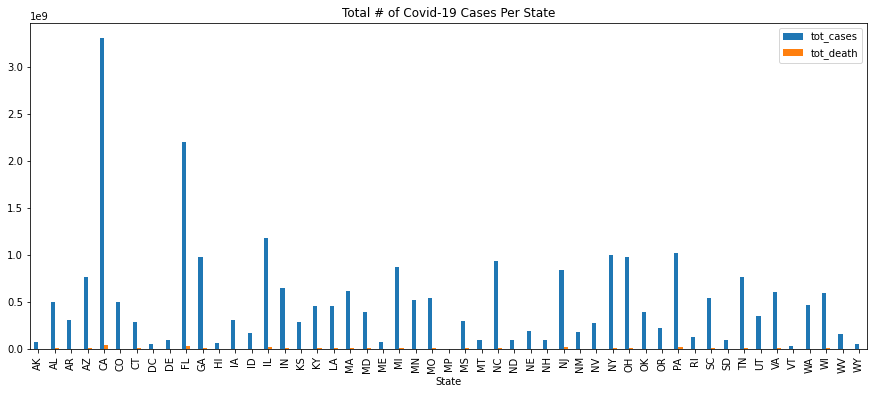

In [43]:
df3.plot(kind='bar' , x='State', y = ['tot_cases','tot_death'], title='Total # of Covid-19 Cases Per State', figsize= (15,6))
plt.savefig('Resources/Total_Number_Covis_Cases_per_state.png')

In [44]:
df4 = pd.read_csv('State_AMI_Totals_2019.csv')
df5 = pd.read_csv('State_AMI_Totals_2020.csv')
df5.head()



,State,18 or Older Estimate,18-25 Estimate,26 or Older Estimate
0,Alabama,797,131,665
1,Alaska,117,24,93
2,Arizona,1339,282,1057
3,Arkansas,514,98,416
4,California,6169,1166,5004


In [45]:
# # Combine the data into a single dataset
# dataFrame_list = [df3, df4]
# merge_df = pd.concat([df3, df4],  axis = 1)
# merge_df


In [46]:
Edu_df = pd.read_excel('Education.xls')
Edu_df.head()

,"Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970-2020",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,"Sources: U.S. Census Bureau, 1970, 1980, 1990,...",NaN,NaN,NaN,NaN,NaN,NaN
1,"For definitions of rural classifications, see ...",NaN,NaN,NaN,NaN,NaN,NaN
2,"This table was prepared by USDA, Economic Rese...",NaN,NaN,NaN,NaN,NaN,NaN
3,Federal Information Processing Standards (FIPS...,State,Area name,"Less than a high school diploma, 2016-20","High school diploma only, 2016-20","Some college or associate's degree, 2016-20","Bachelor's degree or higher, 2016-20"
4,00000,US,United States,25562680,59421420,64496416,73356320


In [47]:
Edu_df.columns

Index(['Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970-2020',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6'],
      dtype='object')

In [48]:
# Rename Columns
Edu_df.rename(columns= {'Unnamed: 1': 'State', 'Unnamed: 2': 'Area name', 'Unnamed: 3' : '<High School', 'Unnamed: 4': 'High School', 'Unnamed: 5': 'Some college or associates degree', 'Unnamed: 6': 'Bachelors degree or higher' }, inplace = True)
Edu_df.head()

,"Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970-2020",State,Area name,<High School,High School,Some college or associates degree,Bachelors degree or higher
0,"Sources: U.S. Census Bureau, 1970, 1980, 1990,...",NaN,NaN,NaN,NaN,NaN,NaN
1,"For definitions of rural classifications, see ...",NaN,NaN,NaN,NaN,NaN,NaN
2,"This table was prepared by USDA, Economic Rese...",NaN,NaN,NaN,NaN,NaN,NaN
3,Federal Information Processing Standards (FIPS...,State,Area name,"Less than a high school diploma, 2016-20","High school diploma only, 2016-20","Some college or associate's degree, 2016-20","Bachelor's degree or higher, 2016-20"
4,00000,US,United States,25562680,59421420,64496416,73356320


In [49]:
Edu_df.dropna().reset_index(drop=True)
Edu_df

,"Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970-2020",State,Area name,<High School,High School,Some college or associates degree,Bachelors degree or higher
0,"Sources: U.S. Census Bureau, 1970, 1980, 1990,...",NaN,NaN,NaN,NaN,NaN,NaN
1,"For definitions of rural classifications, see ...",NaN,NaN,NaN,NaN,NaN,NaN
2,"This table was prepared by USDA, Economic Rese...",NaN,NaN,NaN,NaN,NaN,NaN
3,Federal Information Processing Standards (FIPS...,State,Area name,"Less than a high school diploma, 2016-20","High school diploma only, 2016-20","Some college or associate's degree, 2016-20","Bachelor's degree or higher, 2016-20"
4,00000,US,United States,25562680,59421420,64496416,73356320
...,...,...,...,...,...,...,...
3284,72145,PR,Vega Baja Municipio,9683,10459,8550,7948
3285,72147,PR,Vieques Municipio,1755,2726,735,782
3286,72149,PR,Villalba Municipio,3240,5624,3210,2970
3287,72151,PR,Yabucoa Municipio,6678,6140,6728,4186


In [50]:
#Add total numbers for education attainment per state
Less_than_High_sch = Edu_df.State.unique()
Less_than_High_sch

array([nan, 'State', 'US', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE',
       'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA',
       'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH',
       'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
       'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR'],
      dtype=object)

In [51]:
#Add total numbers for High school per state
x= ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District ", "of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
st_list = []
High_sch = Edu_df.groupby(['Area name']).sum().reset_index()
for state in x:
    st_list.append(High_sch.loc[High_sch['Area name']== state])
edu2 = pd.concat(st_list)
edu2.reset_index(drop=True, inplace=True)
edu2.head()


,Area name,"Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970-2020",State,<High School,High School,Some college or associates degree,Bachelors degree or higher
0,Alaska,02000,AK,33176,137486,167807,144967
1,Alabama,01000,AL,438947,1014342,1013673,877044
2,Arkansas,05000,AR,260360,686812,596855,482695
3,Arizona,04000,AZ,587919,1151988,1637451,1468698
4,California,06000,CA,4286538,5431385,7690347,9256873


In [52]:
edu2.rename(columns = {'State': 'StAbb', 'Area name': 'State', 'Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970-2020':'FIPS'}, inplace = True)
edu2.head()

,State,FIPS,StAbb,<High School,High School,Some college or associates degree,Bachelors degree or higher
0,Alaska,02000,AK,33176,137486,167807,144967
1,Alabama,01000,AL,438947,1014342,1013673,877044
2,Arkansas,05000,AR,260360,686812,596855,482695
3,Arizona,04000,AZ,587919,1151988,1637451,1468698
4,California,06000,CA,4286538,5431385,7690347,9256873


In [53]:
edu2['FIPS'] = edu2['FIPS'].astype(str).str[:-3].astype(np.int64)
edu2

,State,FIPS,StAbb,<High School,High School,Some college or associates degree,Bachelors degree or higher
0,Alaska,2,AK,33176,137486,167807,144967
1,Alabama,1,AL,438947,1014342,1013673,877044
2,Arkansas,5,AR,260360,686812,596855,482695
3,Arizona,4,AZ,587919,1151988,1637451,1468698
4,California,6,CA,4286538,5431385,7690347,9256873
5,Colorado,8,CO,308785,827081,1142035,1622853
6,Connecticut,9,CT,225550,655381,612274,996000
7,Delaware,10,DE,63843,210998,182986,222043
8,Florida,12,FL,1751798,4308542,4535040,4659946
9,Georgia,13,GA,848653,1925374,1969736,2252662


In [54]:
edu2.set_index(['FIPS'], inplace =True)
edu2.head()

,State,StAbb,<High School,High School,Some college or associates degree,Bachelors degree or higher
FIPS,,,,,,
2,Alaska,AK,33176,137486,167807,144967
1,Alabama,AL,438947,1014342,1013673,877044
5,Arkansas,AR,260360,686812,596855,482695
4,Arizona,AZ,587919,1151988,1637451,1468698
6,California,CA,4286538,5431385,7690347,9256873


In [55]:
edu2 = edu2.sort_index()
edu2.head()

,State,StAbb,<High School,High School,Some college or associates degree,Bachelors degree or higher
FIPS,,,,,,
1,Alabama,AL,438947,1014342,1013673,877044
2,Alaska,AK,33176,137486,167807,144967
4,Arizona,AZ,587919,1151988,1637451,1468698
5,Arkansas,AR,260360,686812,596855,482695
6,California,CA,4286538,5431385,7690347,9256873


In [56]:
cols= edu2.columns.drop(['State'])
edu2[cols] =edu2[cols].apply(pd.to_numeric, errors='coerce').convert_dtypes() 
edu2.dtypes

State                                object
StAbb                                 Int64
<High School                          Int64
High School                           Int64
Some college or associates degree     Int64
Bachelors degree or higher            Int64
dtype: object

In [57]:
edu2.to_csv('Resources/Education_cleaned.csv')

In [58]:
edu_ami_df = pd.merge(pd.merge(df4,df5,on='State'),edu2,on='State')
edu_ami_df.shape

(49, 13)

In [59]:
edu_ami_df.head()

,FIPS,State,18 or Older Estimate_x,18-25 Estimate_x,26 or Older Estimate_x,18 or Older Estimate_y,18-25 Estimate_y,26 or Older Estimate_y,StAbb,<High School,High School,Some college or associates degree,Bachelors degree or higher
0,1,Alabama,794,142,652,797,131,665,<NA>,438947,1014342,1013673,877044
1,2,Alaska,113,23,90,117,24,93,<NA>,33176,137486,167807,144967
2,4,Arizona,1099,218,882,1339,282,1057,<NA>,587919,1151988,1637451,1468698
3,5,Arkansas,460,84,376,514,98,416,<NA>,260360,686812,596855,482695
4,6,California,5864,1112,4752,6169,1166,5004,<NA>,4286538,5431385,7690347,9256873


In [60]:
edu_ami_df.to_csv('Resources/Education_merged.csv')

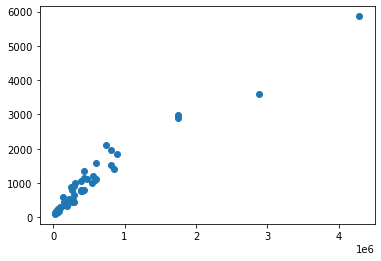

In [61]:
# Plot a scatter graph 
x = edu_ami_df['<High School']
y = edu_ami_df['18 or Older Estimate_x']
plt.scatter(edu_ami_df['<High School'], edu_ami_df['18 or Older Estimate_x'])
plt.show()

In [62]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [63]:
edu_ami_df['<High School'].astype(float).corr(edu_ami_df['18 or Older Estimate_x'])

0.9687062266715857

In [64]:
# assign x and y values for linear regression.
x_values = edu_ami_df['<High School']
y_values = edu_ami_df['18 or Older Estimate_x']

# Perform linear regression.Plota
(slope, intercept, r_value, p_value, std_err) = linregress(x_values.astype(float), y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is : {r_value:.3f}")
  



y = 0.0x + 298.48
The p-value is: 0.000
The r-value is : 0.969


In [65]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(x_value * slope + intercept) for x_value in x_values ]


In [66]:
x_values.tolist()

[438947,
 33176,
 587919,
 260360,
 4286538,
 308785,
 225550,
 63843,
 1751798,
 848653,
 74875,
 100189,
 898338,
 476425,
 158401,
 165373,
 389642,
 66525,
 393028,
 429794,
 596313,
 252331,
 291035,
 393045,
 44228,
 106184,
 273999,
 65455,
 600761,
 191076,
 1743890,
 815216,
 34308,
 738770,
 299032,
 260785,
 809967,
 80258,
 410334,
 45170,
 547733,
 2884734,
 131710,
 28757,
 563601,
 431403,
 159031,
 295207,
 25201]

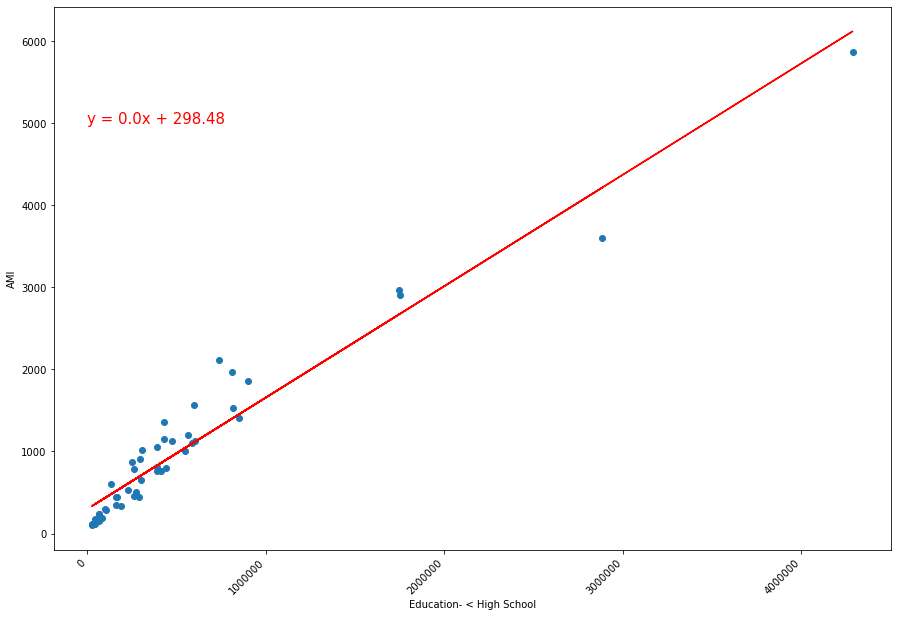

In [67]:
#Import Matplotlib
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.figure(figsize = (15,10))

plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values.tolist(),regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (200,5000), fontsize=15, color="red")
plt.xlabel('Education- < High School')
plt.ylabel('AMI')
plt.xticks (rotation = 45, ha = 'right')
plt.ticklabel_format(style='plain')
plt.savefig("Resources/Education- < High School.png")
plt.show()

In [68]:
income_df = pd.read_excel("Unemployment.xlsx")
income_df.head()

,FIPS_code,State,Area_name,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020
0,0,US,United States,163815890.0,157805900.0,6009990.0,3.668747,161207103.0,148183367.0,13023736.0,8.078885,161758337.0,153099687.0,8658650.0,5.352831,67340.0,NaN
1,1000,AL,Alabama,2271892.0,2199868.0,72024.0,3.200000,2268309.0,2121149.0,147160.0,6.500000,2246993.0,2169721.0,77272.0,3.400000,53958.0,100.000000
2,1001,AL,"Autauga County, AL",26684.0,25920.0,764.0,2.900000,26405.0,24985.0,1420.0,5.400000,26341.0,25599.0,742.0,2.800000,67565.0,125.217762
3,1003,AL,"Baldwin County, AL",98921.0,96044.0,2877.0,2.900000,98910.0,92751.0,6159.0,6.200000,99427.0,96481.0,2946.0,3.000000,71135.0,131.834019
4,1005,AL,"Barbour County, AL",8637.0,8292.0,345.0,4.000000,8680.0,8004.0,676.0,7.800000,8197.0,7728.0,469.0,5.700000,38866.0,72.030097


In [69]:
x= ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District ", "of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
st_list = []
income_median_2020 = income_df.groupby(['Area_name']).sum().reset_index()
for state in x:
    st_list.append(income_median_2020.loc[income_median_2020['Area_name']== state])
med_inc = pd.concat(st_list)
med_inc.reset_index(drop=True, inplace=True)
med_inc.head()

,Area_name,FIPS_code,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020
0,Alaska,2000,352883.0,333541.0,19342.0,5.5,346883.0,318279.0,28604.0,8.2,354936.0,332266.0,22670.0,6.4,79961.0,100.0
1,Alabama,1000,2271892.0,2199868.0,72024.0,3.2,2268309.0,2121149.0,147160.0,6.5,2246993.0,2169721.0,77272.0,3.4,53958.0,100.0
2,Arkansas,5000,1365790.0,1318465.0,47325.0,3.5,1356579.0,1274070.0,82509.0,6.1,1332620.0,1278984.0,53636.0,4.0,51146.0,100.0
3,Arizona,4000,3432476.0,3265925.0,166551.0,4.9,3456852.0,3191100.0,265752.0,7.7,3518425.0,3346319.0,172106.0,4.9,64652.0,100.0
4,California,6000,19409413.0,18612607.0,796806.0,4.1,18931116.0,16996666.0,1934450.0,10.2,18923194.0,17541944.0,1381250.0,7.3,83001.0,100.0


In [70]:
med_inc.rename(columns = {'Area_name': 'State', 'FIPS_code': 'FIPS'}, inplace = True)
med_inc.head()

,State,FIPS,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020
0,Alaska,2000,352883.0,333541.0,19342.0,5.5,346883.0,318279.0,28604.0,8.2,354936.0,332266.0,22670.0,6.4,79961.0,100.0
1,Alabama,1000,2271892.0,2199868.0,72024.0,3.2,2268309.0,2121149.0,147160.0,6.5,2246993.0,2169721.0,77272.0,3.4,53958.0,100.0
2,Arkansas,5000,1365790.0,1318465.0,47325.0,3.5,1356579.0,1274070.0,82509.0,6.1,1332620.0,1278984.0,53636.0,4.0,51146.0,100.0
3,Arizona,4000,3432476.0,3265925.0,166551.0,4.9,3456852.0,3191100.0,265752.0,7.7,3518425.0,3346319.0,172106.0,4.9,64652.0,100.0
4,California,6000,19409413.0,18612607.0,796806.0,4.1,18931116.0,16996666.0,1934450.0,10.2,18923194.0,17541944.0,1381250.0,7.3,83001.0,100.0


In [71]:
med_inc['FIPS'] = med_inc['FIPS'].astype(str).str[:-3].astype(np.int64)
med_inc

,State,FIPS,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020
0,Alaska,2,352883.0,333541.0,19342.0,5.5,346883.0,318279.0,28604.0,8.2,354936.0,332266.0,22670.0,6.4,79961.0,100.0
1,Alabama,1,2271892.0,2199868.0,72024.0,3.2,2268309.0,2121149.0,147160.0,6.5,2246993.0,2169721.0,77272.0,3.4,53958.0,100.0
2,Arkansas,5,1365790.0,1318465.0,47325.0,3.5,1356579.0,1274070.0,82509.0,6.1,1332620.0,1278984.0,53636.0,4.0,51146.0,100.0
3,Arizona,4,3432476.0,3265925.0,166551.0,4.9,3456852.0,3191100.0,265752.0,7.7,3518425.0,3346319.0,172106.0,4.9,64652.0,100.0
4,California,6,19409413.0,18612607.0,796806.0,4.1,18931116.0,16996666.0,1934450.0,10.2,18923194.0,17541944.0,1381250.0,7.3,83001.0,100.0
5,Colorado,8,3100598.0,3019934.0,80664.0,2.6,3087271.0,2874857.0,212414.0,6.9,3156110.0,2986711.0,169399.0,5.4,77688.0,100.0
6,Connecticut,9,1950349.0,1881688.0,68661.0,3.5,1897782.0,1749954.0,147828.0,7.8,1855923.0,1739815.0,116108.0,6.3,79723.0,100.0
7,Delaware,10,484845.0,466856.0,17989.0,3.7,485813.0,449114.0,36699.0,7.6,496430.0,469875.0,26555.0,5.3,71335.0,100.0
8,Florida,12,10259198.0,9928235.0,330963.0,3.2,10094878.0,9267151.0,827727.0,8.2,10312768.0,9843057.0,469711.0,4.6,61724.0,100.0
9,Georgia,13,5152944.0,4967503.0,185441.0,3.6,5079555.0,4751105.0,328450.0,6.5,5186969.0,4983732.0,203237.0,3.9,62800.0,100.0


In [72]:
med_inc.set_index(['FIPS'], inplace =True)
med_inc.head()

,State,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020
FIPS,,,,,,,,,,,,,,,
2,Alaska,352883.0,333541.0,19342.0,5.5,346883.0,318279.0,28604.0,8.2,354936.0,332266.0,22670.0,6.4,79961.0,100.0
1,Alabama,2271892.0,2199868.0,72024.0,3.2,2268309.0,2121149.0,147160.0,6.5,2246993.0,2169721.0,77272.0,3.4,53958.0,100.0
5,Arkansas,1365790.0,1318465.0,47325.0,3.5,1356579.0,1274070.0,82509.0,6.1,1332620.0,1278984.0,53636.0,4.0,51146.0,100.0
4,Arizona,3432476.0,3265925.0,166551.0,4.9,3456852.0,3191100.0,265752.0,7.7,3518425.0,3346319.0,172106.0,4.9,64652.0,100.0
6,California,19409413.0,18612607.0,796806.0,4.1,18931116.0,16996666.0,1934450.0,10.2,18923194.0,17541944.0,1381250.0,7.3,83001.0,100.0


In [73]:
med_inc = med_inc.sort_index()
med_inc.head()

,State,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020
FIPS,,,,,,,,,,,,,,,
1,Alabama,2271892.0,2199868.0,72024.0,3.2,2268309.0,2121149.0,147160.0,6.5,2246993.0,2169721.0,77272.0,3.4,53958.0,100.0
2,Alaska,352883.0,333541.0,19342.0,5.5,346883.0,318279.0,28604.0,8.2,354936.0,332266.0,22670.0,6.4,79961.0,100.0
4,Arizona,3432476.0,3265925.0,166551.0,4.9,3456852.0,3191100.0,265752.0,7.7,3518425.0,3346319.0,172106.0,4.9,64652.0,100.0
5,Arkansas,1365790.0,1318465.0,47325.0,3.5,1356579.0,1274070.0,82509.0,6.1,1332620.0,1278984.0,53636.0,4.0,51146.0,100.0
6,California,19409413.0,18612607.0,796806.0,4.1,18931116.0,16996666.0,1934450.0,10.2,18923194.0,17541944.0,1381250.0,7.3,83001.0,100.0


In [74]:
cols= med_inc.columns.drop(['State'])
med_inc[cols] =med_inc[cols].apply(pd.to_numeric, errors='coerce').convert_dtypes() 
med_inc.dtypes

State                                         object
Civilian_labor_force_2019                      Int64
Employed_2019                                  Int64
Unemployed_2019                                Int64
Unemployment_rate_2019                       Float64
Civilian_labor_force_2020                      Int64
Employed_2020                                  Int64
Unemployed_2020                                Int64
Unemployment_rate_2020                       Float64
Civilian_labor_force_2021                      Int64
Employed_2021                                  Int64
Unemployed_2021                                Int64
Unemployment_rate_2021                       Float64
Median_Household_Income_2020                   Int64
Med_HH_Income_Percent_of_State_Total_2020      Int64
dtype: object

In [75]:
med_inc.drop(['Civilian_labor_force_2019', 'Unemployment_rate_2019', 'Civilian_labor_force_2020', 'Unemployment_rate_2020', 'Civilian_labor_force_2021', 'Unemployment_rate_2021'], axis = 1, inplace =True)


In [76]:
med_inc.head()

,State,Employed_2019,Unemployed_2019,Employed_2020,Unemployed_2020,Employed_2021,Unemployed_2021,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020
FIPS,,,,,,,,,
1,Alabama,2199868,72024,2121149,147160,2169721,77272,53958,100
2,Alaska,333541,19342,318279,28604,332266,22670,79961,100
4,Arizona,3265925,166551,3191100,265752,3346319,172106,64652,100
5,Arkansas,1318465,47325,1274070,82509,1278984,53636,51146,100
6,California,18612607,796806,16996666,1934450,17541944,1381250,83001,100


In [77]:
med_inc.to_csv('Resources/med_inc.csv')

In [78]:
df7 = pd.read_csv("Resources/State_AMI_Covid_Data.csv")

In [81]:
m_income_edu = pd.merge(pd.merge(df7, edu_ami_df, on='State'),med_inc,on='State')
m_income_edu.head()

,Unnamed: 0,State,FIPS_x,Tot_Cases,Tot_Deaths,18_or_Older_2019,18_to_25_2019,26_or_Older_2019,18_or_Older_2020,18_to_25_2020,...,Some college or associates degree,Bachelors degree or higher,Employed_2019,Unemployed_2019,Employed_2020,Unemployed_2020,Employed_2021,Unemployed_2021,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020
0,0,Alabama,1,76993509,406984,794,142,652,797,131,...,1013673,877044,2199868,72024,2121149,147160,2169721,77272,53958,100
1,1,Alaska,2,495866086,8946436,113,23,90,117,24,...,167807,144967,333541,19342,318279,28604,332266,22670,79961,100
2,2,Arizona,4,314253729,4678130,1099,218,882,1339,282,...,1637451,1468698,3265925,166551,3191100,265752,3346319,172106,64652,100
3,3,Arkansas,5,762685906,12984264,460,84,376,514,98,...,596855,482695,1318465,47325,1274070,82509,1278984,53636,51146,100
4,4,California,6,3305642241,41363286,5864,1112,4752,6169,1166,...,7690347,9256873,18612607,796806,16996666,1934450,17541944,1381250,83001,100


In [82]:
m_income_edu.drop("Unnamed: 0", axis = 1, inplace = True)

In [ ]:
# assign x and y values for linear regression.
x_values = income_merged_ami['Unemployed_2019']
y_values = income_merged_ami['18 or Older Estimate_x']

# Perform linear regression.Plota
(slope, intercept, r_value, p_value, std_err) = linregress(x_values.astype(float), y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is : {r_value:.3f}")
  


In [83]:
cols= m_income_edu.columns.drop(['State'])
m_income_edu[cols] =m_income_edu[cols].apply(pd.to_numeric, errors='coerce').convert_dtypes() 
m_income_edu.dtypes

State                                        object
FIPS_x                                        Int64
Tot_Cases                                     Int64
Tot_Deaths                                    Int64
18_or_Older_2019                              Int64
18_to_25_2019                                 Int64
26_or_Older_2019                              Int64
18_or_Older_2020                              Int64
18_to_25_2020                                 Int64
26_or_Older_2020                              Int64
18_or_Older_2021                              Int64
FIPS_y                                        Int64
18 or Older Estimate_x                        Int64
18-25 Estimate_x                              Int64
26 or Older Estimate_x                        Int64
18 or Older Estimate_y                        Int64
18-25 Estimate_y                              Int64
26 or Older Estimate_y                        Int64
StAbb                                         Int64
<High School

In [85]:
m_income_edu.to_csv("Resources/merged_final.csv")